In [8]:
import os
import sys

sys.path.append(os.path.abspath("../.."))


from primeGraph.buffer.factory import History, Incremental, LastValue
from primeGraph.constants import END, START
from primeGraph.graph.executable import Graph
from primeGraph.models.state import GraphState

## Testing execution plan conversion


## Testing execution


In [ ]:
from datetime import datetime
import time

egraph = Graph()


@egraph.node()
def a():
    time.sleep(1)
    print("a \n", datetime.now())


@egraph.node()
def b():
    time.sleep(1)
    print("b \n", datetime.now())


@egraph.node()
def c():
    time.sleep(1)
    print("c \n", datetime.now())


@egraph.node()
def d():
    time.sleep(1)
    print("d \n", datetime.now())


@egraph.node()
def e():
    time.sleep(1)
    print("e \n", datetime.now())


@egraph.node()
def f():
    time.sleep(1)
    print("f", datetime.now())


@egraph.node()
def g():
    time.sleep(1)
    print("g \n", datetime.now())


egraph.add_edge(START, "a")
egraph.add_edge("a", "b")
egraph.add_edge("b", "c")
egraph.add_edge("b", "d")
egraph.add_edge("d", "e")
egraph.add_edge("c", "f")
egraph.add_edge("f", "g")
egraph.add_edge("e", "g")
egraph.add_edge("g", END)

egraph.compile()
egraph.visualize()

In [ ]:
egraph.execution_plan

In [ ]:
egraph.start()

In [10]:
egraph = Graph()


@egraph.node()
def a():
    time.sleep(1)
    print("a", datetime.now())


@egraph.node()
def b():
    time.sleep(1)
    print("b", datetime.now())


@egraph.node()
def c():
    time.sleep(1)
    print("c", datetime.now())


@egraph.node()
def d():
    time.sleep(1)
    print("d", datetime.now())


@egraph.node()
def e():
    time.sleep(1)
    print("e", datetime.now())


@egraph.node()
def f():
    time.sleep(1)
    print("f", datetime.now())


@egraph.node()
def g():
    time.sleep(1)
    time.sleep(1)
    print("g", datetime.now())


egraph.add_edge(START, "a")
egraph.add_edge("a", "b")
egraph.add_edge("b", "c")
egraph.add_edge("c", "d")
egraph.add_edge("d", "e")
egraph.add_edge("e", "f")
egraph.add_edge("f", "g")
egraph.add_edge("g", END)

egraph.compile()
egraph.visualize()

In [ ]:
egraph.execute()

In [ ]:
from rich import print as rprint

# Create a test graph with a mix of parallel and sequential paths
test_graph = Graph()


@test_graph.node()
def start_task():
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Starting workflow \n")
    time.sleep(1)


@test_graph.node()
def parallel_task_1():
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Starting parallel task 1 \n")
    time.sleep(4)
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Finished parallel task 1 \n")


@test_graph.node()
def parallel_task_2():
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Starting parallel task 2 \n")
    time.sleep(4)
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Finished parallel task 2 \n")


@test_graph.node()
def final_task():
    print(f"[{datetime.now().strftime('%H:%M:%S.%f')}] Running final task \n")
    time.sleep(1)


# Create a workflow with parallel execution
test_graph.add_edge(START, "start_task")
test_graph.add_edge("start_task", "parallel_task_1")
test_graph.add_edge("start_task", "parallel_task_2")
test_graph.add_edge("parallel_task_1", "final_task")
test_graph.add_edge("parallel_task_2", "final_task")
test_graph.add_edge("final_task", END)

# Compile and execute
test_graph.compile()
print("\nExecution Plan:")
rprint(test_graph.execution_plan)
print("\nStarting execution:")
start_time = time.time()
test_graph.execute()
end_time = time.time()
print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

## Testing state


#### Test 1


In [ ]:
import time


# Define a state model with different buffer types
class TestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    metrics: History[Dict[str, float]]  # Will keep history of all updates
    current_status: LastValue[str]  # Will only keep last value


# Initialize the graph with state
state = TestState(counter=0, metrics={}, current_status="")

test_graph = Graph(state=state)


# Test Incremental Buffer
@test_graph.node()
def add_to_counter(state):
    time.sleep(0.5)
    return {"counter": 5}


@test_graph.node()
def add_more_to_counter(state):
    time.sleep(0.5)
    return {"counter": 3}


# Test History Buffer
@test_graph.node()
def add_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"accuracy": 0.95, "loss": 0.1}}


@test_graph.node()
def update_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"loss": 0.05, "precision": 0.88}}


# Test LastValue Buffer
@test_graph.node()
def set_status_running(state):
    time.sleep(0.5)
    return {"current_status": "running"}


@test_graph.node()
def set_status_complete(state):
    time.sleep(0.5)
    return {"current_status": "complete"}


# Create the workflow
test_graph.add_edge(START, "add_to_counter")
test_graph.add_edge("add_to_counter", "add_more_to_counter")
test_graph.add_edge("add_more_to_counter", "add_metrics")
test_graph.add_edge("add_metrics", "update_metrics")
test_graph.add_edge("update_metrics", "set_status_running")
test_graph.add_edge("set_status_running", "set_status_complete")
test_graph.add_edge("set_status_complete", END)

# Compile and execute
test_graph.compile()
test_graph.execute(timeout=10)

# Print final state
print("\nFinal State:")
print(f"Counter: {test_graph.state.counter}")  # Should be 8 (5 + 3)
print(
    f"Metrics History: {test_graph.state.metrics}"
)  # Should contain both metric updates
print(f"Current Status: {test_graph.state.current_status}")  # Should be "complete"

In [ ]:
test_graph.visualize()

#### Test 2


In [ ]:
from typing import Dict

from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.constants import END, START
from tiny_graph.graph.executable import Graph
from tiny_graph.models.state import GraphState


# Define a state model with different buffer types
class TestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    metrics: History[Dict[str, float]]  # Will keep history of all updates
    current_status: LastValue[str]  # Will only keep last value


# Initialize the graph with state
state = TestState(counter=0, metrics={}, current_status="")

test_graph = Graph(state=state)


# Define nodes that will run in parallel and update the same state
@test_graph.node()
def increment_counter(state):
    time.sleep(0.5)
    return {"counter": 1}


@test_graph.node()
def decrement_counter(state):
    time.sleep(0.5)
    return {"counter": -1}


@test_graph.node()
def update_status(state):
    time.sleep(0.5)
    return {"current_status": "in_progress"}


# Create the workflow with parallel execution
test_graph.add_edge(START, "increment_counter")
test_graph.add_edge(START, "decrement_counter")
test_graph.add_edge(START, "update_status")
test_graph.add_edge("increment_counter", END)
test_graph.add_edge("decrement_counter", END)
test_graph.add_edge("update_status", END)

# Compile and execute
test_graph.compile()
test_graph.execute(timeout=10)

# Print final state
print("\nFinal State:")
print(
    f"Counter: {test_graph.state.counter}"
)  # Should reflect the net effect of increments and decrements
print(
    f"Metrics History: {test_graph.state.metrics}"
)  # Should be empty as no metrics are updated
print(f"Current Status: {test_graph.state.current_status}")  # Should be "in_progress"

In [ ]:
test_graph.execution_plan

In [ ]:
test_graph.visualize()

In [ ]:
graph = Graph()


@graph.node()
def escape():
    print("Starting workflow")


@graph.node()
def process_data():
    print("Processing data")


@graph.node()
def validate():
    print("Validating results")


@graph.node()
def aa():
    print("Validating results")


@graph.node()
def bb():
    print("Validating results")


@graph.node()
def prep():
    print("Workflow complete")


graph.add_edge(START, "process_data")
graph.add_edge("process_data", "validate")
graph.add_edge("validate", "escape")
graph.add_edge("escape", "prep")
graph.add_edge("validate", "aa")
graph.add_edge("aa", "bb")
graph.add_edge("bb", "prep")
graph.add_edge("prep", END)

graph.compile()
graph.visualize()

In [ ]:
graph.execution_plan

#### Test 3


In [ ]:
from typing import Dict

from rich import print as rprint
from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.graph.executable import Graph
from tiny_graph.models.state import GraphState


# Define a state model with buffer types
class ComplexTestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    status: LastValue[str]  # Will only keep last value
    metrics: History[Dict[str, float]]  # Will keep history of all updates


# Initialize the graph with state
state = ComplexTestState(counter=3, status="", metrics={})
graph = Graph(state=state)


# Define nodes that will run in parallel and update the same state
@graph.node()
def increment_counter(state):
    time.sleep(0.5)
    return {"counter": 2}


@graph.node()
def decrement_counter(state):
    time.sleep(0.5)
    return {"counter": -1}


@graph.node()
def update_status_to_in_progress(state):
    time.sleep(0.5)
    return {"status": "in_progress"}


@graph.node()
def update_status_to_complete(state):
    time.sleep(0.5)
    return {"status": "complete"}


@graph.node()
def add_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"accuracy": 0.9, "loss": 0.1}}


@graph.node()
def update_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"loss": 0.05, "precision": 0.85}}


@graph.node()
def finalize_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"loss": 0.01, "precision": 0.99}}


# Create the workflow with multiple levels of execution
graph.add_edge(START, "increment_counter")
graph.add_edge(START, "decrement_counter")
graph.add_edge(START, "update_status_to_in_progress")
graph.add_edge("increment_counter", "add_metrics")
graph.add_edge("decrement_counter", "add_metrics")
graph.add_edge("add_metrics", "update_metrics")
graph.add_edge("update_metrics", "finalize_metrics")
graph.add_edge("update_status_to_in_progress", "update_status_to_complete")
graph.add_edge("update_status_to_complete", "finalize_metrics")
graph.add_edge("finalize_metrics", END)

# Compile and execute
graph.compile()


graph.start(timeout=10)

rprint(graph.state)

# Assert final state
assert (
    graph.state.counter == 1
), "Counter should reflect net effect of increments and decrements"
assert graph.state.status == "complete", "Status should be 'complete'"
assert len(graph.state.metrics) == 3, "Metrics should contain three updates"

In [ ]:
rprint(state)

In [ ]:
graph.visualize()

In [ ]:
from typing import Dict

from rich import print as rprint
from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.graph.executable import Graph
from tiny_graph.models.state import GraphState


# Define a state model with buffer types
class ComplexTestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    status: LastValue[str]  # Will only keep last value
    metrics: History[Dict[str, float]]  # Will keep history of all updates


# Initialize the graph with state
state = ComplexTestState(counter=3, status="", metrics={"xablau": 2.0})
graph = Graph(state=state)


# Define nodes that will run in parallel and update the same state
@graph.node()
def increment_counter(state):
    time.sleep(0.5)
    return {"counter": 2}


@graph.node()
def decrement_counter(state):
    time.sleep(0.5)
    return {"counter": -1}


@graph.node()
def update_status_to_in_progress(state):
    time.sleep(0.5)
    return {"status": "in_progress"}


@graph.node()
def update_status_to_complete(state):
    time.sleep(0.5)
    return {"status": "complete"}


@graph.node()
def add_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"accuracy": 0.9, "loss": 0.1}}


@graph.node()
def update_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"loss": 0.05, "precision": 0.85}}


@graph.node()
def finalize_metrics(state):
    time.sleep(0.5)
    return {"metrics": {"loss": 0.01, "precision": 0.99}}


# Create the workflow with multiple levels of execution
graph.add_edge(START, "increment_counter")
graph.add_edge(START, "decrement_counter")
graph.add_edge(START, "update_status_to_in_progress")
graph.add_edge("increment_counter", "add_metrics")
graph.add_edge("decrement_counter", "add_metrics")
graph.add_edge("add_metrics", "update_metrics")
graph.add_edge("update_metrics", "finalize_metrics")
graph.add_edge("update_status_to_in_progress", "update_status_to_complete")
graph.add_edge("update_status_to_complete", "finalize_metrics")
graph.add_edge("finalize_metrics", END)

# Compile and execute
graph.compile()

In [ ]:
graph.buffers["counter"].value

In [ ]:
graph.buffers["metrics"].value

#### Test 4


In [ ]:
simple_graph = Graph()


# Define some example actions
@simple_graph.node(interrupt="before")
def escape():
    print("Starting workflow")


@simple_graph.node()
def process_data():
    print("Processing data")


@simple_graph.node()
def validate():
    print("Validating results")


@simple_graph.node()
def aa():
    print("Validating results")


@simple_graph.node()
def bb():
    print("Validating results")


@simple_graph.node()
def dd():
    print("Validating results")


@simple_graph.node()
def cc():
    print("Validating results")


@simple_graph.node()
def hh():
    print("Validating results")


@simple_graph.node()
def prep():
    print("Workflow complete")


# Add edges to create workflow
simple_graph.add_edge(START, "process_data")
simple_graph.add_edge("process_data", "validate")
simple_graph.add_edge("validate", "escape")
simple_graph.add_edge("escape", "dd")
simple_graph.add_edge("escape", "cc")
simple_graph.add_edge("cc", "hh")
simple_graph.add_edge("dd", "hh")
simple_graph.add_edge("hh", "prep")
simple_graph.add_edge("validate", "aa")
simple_graph.add_edge("aa", "bb")
simple_graph.add_edge("bb", "prep")
simple_graph.add_edge("prep", END)

simple_graph.compile()

In [ ]:
simple_graph.visualize()

In [ ]:
simple_graph.execution_plan

In [ ]:
from rich import print as rprint

rprint(simple_graph.execution_plan)

In [ ]:
rprint(simple_graph._convert_execution_plan())

In [ ]:
def slice_execution_plan(plan, metadata):
    def slice_list(lst, meta):
        result = []
        for item in lst:
            if isinstance(item, list):
                # Recursively slice nested lists
                sliced_item = slice_list(item, meta)
                if sliced_item:
                    result.append(sliced_item)
            else:
                # Check metadata for slicing
                if meta.get(item) == "before":
                    break
                result.append(item)
                if meta.get(item) == "after":
                    break
        return result

    return slice_list(plan, metadata)


# Example usage
execution_plan = [
    "process_data",
    "validate",
    [["escape", ["dd", "cc"], "hh"], ["aa", "bb"]],
    "prep",
]
metadata = {
    # 'process_data': 'after',
    # 'validate': 'before',
    # 'escape': 'after',
    "dd": "before",
    # 'cc': 'after',
    # 'hh': 'before',
    # 'aa': 'after',
    # 'bb': 'before',
    # 'prep': 'after'
}

sliced_plan = slice_execution_plan(execution_plan, metadata)
print(sliced_plan)

In [ ]:
execution_plan[2:]

In [ ]:
simple_graph.execute()

In [ ]:
# problem here is that in the case of update_status_to_complete,
# it's not checking if the next node is a convergence point

# it needs to have a function that will check if the next node
# connector. find_convergence_point is not doing enough.

## Testing interruption


### Test 1


In [ ]:
from typing import Dict

from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.models.state import GraphState


# Define a state model with different buffer types
class TestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    metrics: History[Dict[str, float]]  # Will keep history of all updates
    current_status: LastValue[str]  # Will only keep last value


# Initialize the graph with state
state = TestState(counter=0, metrics={}, current_status="")

test_graph = Graph(state=state)


# Test Incremental Buffer
@test_graph.node()
def add_to_counter(state):
    time.sleep(0.5)
    print("add_to_counter")
    return {"counter": 5}


@test_graph.node()
def add_more_to_counter(state):
    print("add_more_to_counter")
    time.sleep(0.5)
    return {"counter": 3}


# Test History Buffer
@test_graph.node(interrupt="before")
def add_metrics(state):
    time.sleep(0.5)
    print("add_metrics")
    return {"metrics": {"accuracy": 0.95, "loss": 0.1}}


@test_graph.node()
def update_metrics(state):
    time.sleep(0.5)
    print("update_metrics")
    return {"metrics": {"loss": 0.05, "precision": 0.88}}


# Test LastValue Buffer
@test_graph.node(interrupt="after")
def set_status_running(state):
    time.sleep(0.5)
    print("set_status_running")
    return {"current_status": "running"}


@test_graph.node()
def set_status_complete(state):
    time.sleep(0.5)
    print("set_status_complete")
    return {"current_status": "complete"}


# Create the workflow
test_graph.add_edge(START, "add_to_counter")
test_graph.add_edge("add_to_counter", "add_more_to_counter")
test_graph.add_edge("add_more_to_counter", "add_metrics")
test_graph.add_edge("add_metrics", "update_metrics")
test_graph.add_edge("update_metrics", "set_status_running")
test_graph.add_edge("set_status_running", "set_status_complete")
test_graph.add_edge("set_status_complete", END)

# Compile and execute
test_graph.compile()
test_graph.visualize()

In [ ]:
test_graph.execute()

In [ ]:
test_graph.resume()

In [ ]:
test_graph.resume()

In [ ]:
test_graph.executed_nodes

In [ ]:
from rich import print as rprint

test_graph._convert_execution_plan()
rprint(test_graph.execution_plan)

### Test 2


In [ ]:
x = escape

x.__metadata__["interrupt"]

In [ ]:
simple_graph = Graph()


# Define some example actions
@simple_graph.node(interrupt="before")
def escape():
    time.sleep(0.5)
    print("escape")


@simple_graph.node()
def process_data():
    time.sleep(1.5)
    print("process_data")


@simple_graph.node()
def validate():
    time.sleep(0.5)
    print("validate")


@simple_graph.node()
def aa():
    time.sleep(1.5)
    print("aa")


@simple_graph.node()
def bb():
    time.sleep(0.5)
    print("bb")


@simple_graph.node()
def dd():
    time.sleep(1.5)
    print("dd")


@simple_graph.node()
def cc():
    time.sleep(1.5)
    print("cc")


@simple_graph.node()
def hh():
    time.sleep(0.5)
    print("hh")


@simple_graph.node()
def prep():
    time.sleep(0.5)
    print("prep")


# Add edges to create workflow
simple_graph.add_edge(START, "process_data")
simple_graph.add_edge("process_data", "validate")
simple_graph.add_edge("validate", "escape")
simple_graph.add_edge("escape", "dd")
simple_graph.add_edge("escape", "cc")
simple_graph.add_edge("cc", "hh")
simple_graph.add_edge("dd", "hh")
simple_graph.add_edge("hh", "prep")
simple_graph.add_edge("validate", "aa")
simple_graph.add_edge("aa", "bb")
simple_graph.add_edge("bb", "prep")
simple_graph.add_edge("prep", END)

simple_graph.compile()

simple_graph.visualize()

In [ ]:
from rich import print as rprint

rprint(simple_graph.execution_path)

In [ ]:
from rich import print as rprint

rprint(simple_graph.detailed_execution_path)

In [ ]:
from rich import print as rprint

simple_graph._convert_execution_plan()
rprint(simple_graph.execution_plan)

In [ ]:
from typing import List, Tuple, Union

from rich import print as rprint
from tiny_graph.graph.executable import ExecutableNode


def add_item_to_obj_store(obj_store: Union[List, Tuple], item):
    if isinstance(obj_store, list):
        obj_store.append(item)
        return obj_store  # Return the modified list
    elif isinstance(obj_store, tuple):
        return obj_store + (item,)  # Already returns the new tuple
    else:
        raise ValueError(f"Unsupported object store type: {type(obj_store)}")


def extract_tasks_from_node(node, tasks=[]):
    """
    Extracts tasks from a node, including nested nodes
    returns lists for sequential execution and tuples for parallel execution
    """
    tasks = [] if node.execution_type == "sequential" else tuple()
    for task in node.task_list:
        if isinstance(task, ExecutableNode):
            if task.execution_type == "sequential":
                tasks = add_item_to_obj_store(tasks, extract_tasks_from_node(task, []))
            else:
                tasks = add_item_to_obj_store(
                    tasks, extract_tasks_from_node(task, tuple())
                )
        else:
            tasks = add_item_to_obj_store(tasks, task)

    return tasks


rprint(extract_tasks_from_node(simple_graph.execution_plan[2]))

In [ ]:
simple_graph.execute()

In [ ]:
simple_graph.resume()

In [ ]:
simple_graph.resume()

### Test 3


In [ ]:
from typing import Dict

from rich import print as rprint
from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.graph.executable import Graph
from tiny_graph.models.state import GraphState


# Define a state model with buffer types
class ComplexTestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    status: LastValue[str]  # Will only keep last value
    metrics: History[Dict[str, float]]  # Will keep history of all updates


# Initialize the graph with state
state = ComplexTestState(counter=0, status="", metrics={})
graph = Graph(state=state)


# Define nodes that will run in parallel and update the same state
@graph.node()
def increment_counter(state):
    time.sleep(0.5)
    print("increment_counter")
    return {"counter": 2}


@graph.node()
def decrement_counter(state):
    time.sleep(0.5)
    print("decrement_counter")
    return {"counter": -1}


@graph.node()
def update_status_to_in_progress(state):
    time.sleep(0.5)
    print("update_status_to_in_progress")
    return {"status": "in_progress"}


@graph.node()
def update_status_to_complete(state):
    time.sleep(0.5)
    print("update_status_to_complete")
    return {"status": "complete"}


@graph.node(interrupt="after")
def add_metrics(state):
    time.sleep(0.5)
    print("add_metrics")
    return {"metrics": {"accuracy": 0.9, "loss": 0.1}}


@graph.node()
def update_metrics(state):
    time.sleep(0.5)
    print("update_metrics")
    return {"metrics": {"loss": 0.05, "precision": 0.85}}


@graph.node(interrupt="before")
def finalize_metrics(state):
    time.sleep(0.5)
    print("finalize_metrics")
    return {"metrics": {"loss": 0.01, "precision": 0.99}}


# Create the workflow with multiple levels of execution
graph.add_edge(START, "increment_counter")
graph.add_edge(START, "decrement_counter")
graph.add_edge(START, "update_status_to_in_progress")
graph.add_edge("increment_counter", "add_metrics")
graph.add_edge("decrement_counter", "add_metrics")
graph.add_edge("add_metrics", "update_metrics")
graph.add_edge("update_metrics", "finalize_metrics")
graph.add_edge("update_status_to_in_progress", "update_status_to_complete")
graph.add_edge("update_status_to_complete", "finalize_metrics")
graph.add_edge("finalize_metrics", END)

# Compile and execute
graph.compile()
graph.visualize()

In [ ]:
from rich import print as rprint

rprint(graph.execution_path)

In [ ]:
from rich import print as rprint

graph._convert_execution_plan()
rprint(graph.execution_plan)

In [ ]:
graph.execute()

In [ ]:
graph.resume()

In [ ]:
graph.resume()

In [ ]:
graph.state

### Test 4


In [ ]:
graph.edges

In [ ]:
from tiny_graph.buffer.factory import History
from tiny_graph.models.state import GraphState


class StateForTestWithHistory(GraphState):
    execution_order: History[str]


state = StateForTestWithHistory(execution_order=[])
graph = Graph(state=state)


@graph.node()
def task1(state):
    return {"execution_order": "task1"}


@graph.node(interrupt="after")
def task2(state):
    return {"execution_order": "task2"}


@graph.node(interrupt="before")
def task3(state):
    return {"execution_order": "task3"}


@graph.node()
def task4(state):
    return {"execution_order": "task4"}


graph.add_edge(START, "task1")
graph.add_edge("task1", "task2")
graph.add_edge("task2", "task3")
graph.add_edge("task3", "task4")
graph.add_edge("task4", END)
graph.compile()

In [ ]:
graph.execute()

In [ ]:
graph.resume()

In [ ]:
graph.state

In [ ]:
[edge.id for edge in graph.edges if edge.end_node == "__start__"]

In [ ]:
graph.detailed_execution_path

## Testing Async Execution


### Test 1 (testing non-async using execute_async)


In [ ]:
from typing import Dict

from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.models.state import GraphState


# Define a state model with different buffer types
class TestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    metrics: History[Dict[str, float]]  # Will keep history of all updates
    current_status: LastValue[str]  # Will only keep last value


# Initialize the graph with state
state = TestState(counter=0, metrics=[], current_status="")

test_graph = Graph(state=state)


# Test Incremental Buffer
@test_graph.node()
def add_to_counter(state):
    time.sleep(0.5)
    print("add_to_counter")
    return {"counter": 5}


@test_graph.node()
def add_more_to_counter(state):
    print("add_more_to_counter")
    time.sleep(0.5)
    return {"counter": 3}


# Test History Buffer
@test_graph.node(interrupt="before")
def add_metrics(state):
    time.sleep(0.5)
    print("add_metrics")
    return {"metrics": {"accuracy": 0.95, "loss": 0.1}}


@test_graph.node()
def update_metrics(state):
    time.sleep(0.5)
    print("update_metrics")
    return {"metrics": {"loss": 0.05, "precision": 0.88}}


# Test LastValue Buffer
@test_graph.node(interrupt="after")
def set_status_running(state):
    time.sleep(0.5)
    print("set_status_running")
    return {"current_status": "running"}


@test_graph.node()
def set_status_complete(state):
    time.sleep(0.5)
    print("set_status_complete")
    return {"current_status": "complete"}


# Create the workflow
test_graph.add_edge(START, "add_to_counter")
test_graph.add_edge("add_to_counter", "add_more_to_counter")
test_graph.add_edge("add_more_to_counter", "add_metrics")
test_graph.add_edge("add_metrics", "update_metrics")
test_graph.add_edge("update_metrics", "set_status_running")
test_graph.add_edge("set_status_running", "set_status_complete")
test_graph.add_edge("set_status_complete", END)

# Compile and execute
test_graph.compile()
test_graph.visualize()

In [ ]:
await test_graph.execute_async()

In [ ]:
test_graph.resume()

In [ ]:
test_graph.resume()

In [ ]:
test_graph.executed_nodes

In [ ]:
from rich import print as rprint

test_graph._convert_execution_plan()
rprint(test_graph.execution_plan)

### Test 2


In [ ]:
simple_graph = Graph()


# Define some example actions
@simple_graph.node()
def step_1():
    time.sleep(1)
    print("start")


@simple_graph.node()
def step_A():
    time.sleep(2)
    print("step_A")


@simple_graph.node()
def step_B():
    time.sleep(2)
    print("step_B")


@simple_graph.node()
def step_2():
    time.sleep(1)
    print("step_2")


# Add edges to create workflow
simple_graph.add_edge(START, "step_1")
simple_graph.add_edge("step_1", "step_A")
simple_graph.add_edge("step_1", "step_B")
simple_graph.add_edge("step_A", "step_2")
simple_graph.add_edge("step_B", "step_2")
simple_graph.add_edge("step_2", END)

simple_graph.compile()

simple_graph.visualize()

In [ ]:
simple_graph.start()

In [ ]:
await simple_graph.execute_async()

In [ ]:
simple_graph.execution_plan

### Test 3


In [ ]:
import asyncio

simple_graph = Graph()


# Define some example actions
@simple_graph.node()
async def step_1():
    await asyncio.sleep(1)
    print("start")


@simple_graph.node()
async def step_A():
    await asyncio.sleep(2)
    print("step_A")


@simple_graph.node()
async def step_B():
    await asyncio.sleep(2)
    print("step_B")


@simple_graph.node()
async def step_2():
    await asyncio.sleep(1)
    print("step_2")


# Add edges to create workflow
simple_graph.add_edge(START, "step_1")
simple_graph.add_edge("step_1", "step_A")
simple_graph.add_edge("step_1", "step_B")
simple_graph.add_edge("step_A", "step_2")
simple_graph.add_edge("step_B", "step_2")
simple_graph.add_edge("step_2", END)

simple_graph.compile()

simple_graph.visualize()

In [ ]:
await simple_graph.execute_async()

### Test 4


In [ ]:
from tiny_graph.buffer.factory import History
from tiny_graph.models.state import GraphState


class StateForTestWithHistory(GraphState):
    execution_order: History[str]


state = StateForTestWithHistory(execution_order=[])
graph = Graph(state=state)


@graph.node()
async def task1(state):
    print("task1")
    return {"execution_order": "task1"}


@graph.node()
async def task2(state):
    print("task2")
    return {"execution_order": "task2"}


@graph.node(interrupt="before")
async def task3(state):
    print("task3")
    return {"execution_order": "task3"}


@graph.node()
async def task4(state):
    print("task4")
    return {"execution_order": "task4"}


# Create parallel paths
graph.add_edge(START, "task1")
graph.add_edge("task1", "task2")
graph.add_edge("task1", "task3")
graph.add_edge("task2", "task4")
graph.add_edge("task3", "task4")
graph.add_edge("task4", END)
graph.compile()

# First execution should execute task1 and task3, but pause before task2
# await graph.start_async()
graph.visualize()

In [ ]:
await graph.resume_async()

In [ ]:
await graph.resume_async()

In [ ]:
state

In [ ]:
graph.visualize()

In [ ]:
graph.state.execution_order

In [ ]:
from tiny_graph.buffer.factory import History, Incremental, LastValue
from tiny_graph.models.state import GraphState


class StateForTestWithHistory(GraphState):
    execution_order: History[str]
    counter: Incremental[int]


StateForTestWithHistory(execution_order=["a", 2], counter=1)

In [ ]:
from typing import Dict


class ComplexTestState(GraphState):
    counter: Incremental[int]  # Will accumulate values
    status: LastValue[str]  # Will only keep last value
    metrics: History[Dict[str, float]]  # Will keep history of all updates


ComplexTestState(counter=0, status="", metrics=[])

In [ ]:
from tiny_graph.checkpoint.local_storage import LocalStorage


class SimpleGraphState(GraphState):
    messages: History[str]


# Create state instance
state = SimpleGraphState(messages=[])

# Update graph with state
storage = LocalStorage()
graph1 = Graph(state=state, checkpoint_storage=storage)


@graph1.node()
def add_hello(state: GraphState):
    return {"messages": "Hello"}


@graph1.node()
def add_world(state: GraphState):
    return {"messages": "World"}


@graph1.node()
def add_exclamation(state: GraphState):
    return {"messages": "!"}


# Add edges
graph1.add_edge(START, "add_hello")
graph1.add_edge("add_hello", "add_world")
graph1.add_edge("add_world", "add_exclamation")
graph1.add_edge("add_exclamation", END)

# Add nodes and edges...
graph1.compile()
graph1.visualize()

In [ ]:
await graph1.start_async()

In [ ]:
state

In [ ]:
storage._storage

## Testing Subgraph Execution


### Test 1


In [ ]:
main_graph = Graph()


@main_graph.node()
def start_process():
    print("Starting main process")


@main_graph.node()
def end_process():
    print("Ending main process")


# Create subgraph
sub_graph = Graph()


@sub_graph.node()
def sub_task1():
    print("Subtask 1")


@sub_graph.node()
def sub_task2():
    print("Subtask 2")


# Add edges to subgraph
sub_graph.add_edge(START, "sub_task1")
sub_graph.add_edge("sub_task1", "sub_task2")
sub_graph.add_edge("sub_task2", END)


# Add subgraph as a node to main graph
@main_graph.subgraph(name="processing")
def processing_subgraph():
    return sub_graph


# Add edges to main graph including the subgraph
main_graph.add_edge(START, "start_process")
main_graph.add_edge("start_process", "processing")  # Connect to subgraph
main_graph.add_edge("processing", "end_process")  # Connect from subgraph
main_graph.add_edge("end_process", END)

# Compile and visualize
main_graph.compile()
main_graph.visualize()

In [ ]:
main_graph.nodes

In [ ]:
main_graph.edges

In [ ]:
vmain_graph.start()

### Test 2


In [ ]:
class SubgraphState(GraphState):
    execution_order: History[str]
    counter: Incremental[int]
    status: LastValue[str]


state = SubgraphState(execution_order=[], counter=0, status="")
main_graph = Graph(state=state)


# Create a subgraph
@main_graph.subgraph()
def processing_subgraph():
    subgraph = Graph(state=state)

    @subgraph.node()
    def process_a(state):
        return {"execution_order": "process_a", "counter": 1}

    @subgraph.node()
    def process_b(state):
        return {"execution_order": "process_b", "counter": 2}

    subgraph.add_edge(START, "process_a")
    subgraph.add_edge("process_a", "process_b")
    subgraph.add_edge("process_b", END)

    return subgraph


# Main graph nodes
@main_graph.node()
def start_task(state):
    return {"execution_order": "start_task", "status": "started"}


@main_graph.node()
def end_task(state):
    return {"execution_order": "end_task", "status": "completed"}


# Connect main graph
main_graph.add_edge(START, "start_task")
main_graph.add_edge("start_task", "processing_subgraph")
main_graph.add_edge("processing_subgraph", "end_task")
main_graph.add_edge("end_task", END)

main_graph.compile()

In [ ]:
main_graph.nodes

In [ ]:
main_graph.visualize()

### Test 3


In [ ]:
class SubgraphState(GraphState):
    execution_order: History[str]
    counter: Incremental[int]
    status: LastValue[str]


state = SubgraphState(execution_order=[], counter=0, status="")
main_graph = Graph(state=state)


def nested_subgraph():
    nested = Graph(state=state)

    @nested.node()
    def nested_task(state):
        return {"execution_order": "nested_task", "counter": 1}

    @nested.node()
    def nested_task_2(state):
        return {"execution_order": "nested_task_2", "counter": 2}

    nested.add_edge(START, "nested_task")
    nested.add_edge("nested_task", "nested_task_2")
    nested.add_edge("nested_task_2", END)
    return nested


# Create parent subgraph containing nested subgraph
@main_graph.subgraph()
def parent_subgraph():
    parent = Graph(state=state)

    @parent.node()
    def parent_task(state):
        return {"execution_order": "parent_task", "counter": 2}

    @parent.subgraph()
    def inner_nested():
        return nested_subgraph()

    parent.add_edge(START, "parent_task")
    parent.add_edge("parent_task", "inner_nested")
    parent.add_edge("inner_nested", END)
    return parent


# Main graph setup
@main_graph.node()
def main_task(state):
    return {"execution_order": "main_task", "status": "running"}


main_graph.add_edge(START, "main_task")
main_graph.add_edge("main_task", "parent_subgraph")
main_graph.add_edge("parent_subgraph", END)

main_graph.compile()

In [ ]:
main_graph.start()

In [ ]:
main_graph.nodes

In [ ]:
main_graph.visualize()

## Testing Repeated Nodes


### Test 1


In [ ]:
graph = Graph()


@graph.node()
def node_a():
    print("Node A")


@graph.node()
def node_b():
    print("Node B\n")


@graph.node()
def node_c():
    print("Node C")


# Add a repeat edge that runs node_b 3 times sequentially
graph.add_edge(START, "node_a")
graph.add_repeating_edge("node_a", "node_b", "node_c", repeat=3, parallel=False)
graph.add_edge("node_c", END)

# Or run in parallel
# graph.add_repeat_edge("node_a", "node_b", "node_c", repeat=3, parallel=True)

graph.compile()

In [ ]:
graph.visualize()

In [ ]:
graph.edges

In [ ]:
graph.nodes

In [ ]:
graph.executed_nodes

In [ ]:
graph.detailed_execution_path

In [ ]:
graph.start()

### Test 2 (async)


In [ ]:
class StateWithHistory(GraphState):
    execution_order: History[str]
    execution_times: History[float]
    counter: Incremental[int]


state = StateWithHistory(execution_order=[], execution_times=[], counter=0)
graph = Graph(state=state)


@graph.node()
async def start_task(state):
    return {}


@graph.node()
async def cpu_intensive_task(state):
    # Simulate CPU-intensive work
    await asyncio.sleep(0.1)
    print("cpu_intensive_task_parallel")
    result = 0
    for _ in range(1000000):
        result += 1
    current_time = time.time()
    return {
        "execution_order": f"task_{len(state.execution_order)}",
        "execution_times": current_time,
        "counter": 1,
    }


# Create parallel execution with many repetitions
graph.add_edge(START, "start_task")
graph.add_repeating_edge(
    "start_task", "cpu_intensive_task", END, repeat=10, parallel=True
)
graph.compile()

start_time = time.time()
await graph.start_async()
parallel_time = time.time() - start_time
print(f"Parallel execution time: {parallel_time}")

# Now test sequential execution
graph2 = Graph(
    state=StateWithHistory(execution_order=[], execution_times=[], counter=0)
)


@graph2.node()
async def start_task(state):
    return {}


@graph2.node()
async def cpu_intensive_task(state):
    # Same task as above
    await asyncio.sleep(0.1)
    print("cpu_intensive_task_sequential")
    result = 0
    for _ in range(1000000):
        result += 1
    current_time = time.time()
    return {
        "execution_order": f"task_{len(state.execution_order)}",
        "execution_times": current_time,
        "counter": 1,
    }


graph2.add_edge(START, "start_task")
graph2.add_repeating_edge(
    "start_task", "cpu_intensive_task", END, repeat=10, parallel=False
)
graph2.compile()

start_time = time.time()
await graph2.start_async()
sequential_time = time.time() - start_time

# Parallel execution should be significantly faster
assert parallel_time < sequential_time * 0.7  # At least 30% faster

In [ ]:
parallel_time, sequential_time

In [ ]:
from rich import print as rprint

rprint(graph.execution_plan)

In [ ]:
rprint(graph.detailed_execution_path)

In [ ]:
state

In [ ]:
graph.edges

In [ ]:
graph.nodes

In [ ]:
graph.visualize()

## Testing Router Nodes


### Test 1


In [ ]:
from primeGraph.checkpoint.local_storage import LocalStorage


# Example usage
class TestState(GraphState):
    result: LastValue[dict]  # Store the result from routes
    execution_order: History[str]  # Track execution order


storage = LocalStorage()
graph = Graph(
    state=TestState(result={}, execution_order=[]), checkpoint_storage=storage
)


@graph.node()
def process_data(state):
    print("Executing process_data")
    # Router node that returns a node name
    if True:
        return "route_a"
    return "route_b"


@graph.node()
def route_a(state):
    print("Executing route_a")
    return {"result": {"result": "from route A"}, "execution_order": "route_a"}


@graph.node()
def route_b(state):
    print("Executing route_b")
    return {"result": {"result": "from route B"}, "execution_order": "route_b"}


@graph.node()
def route_a2(state):
    print("Executing route_a2")
    return {"result": {"result": "from route A2"}, "execution_order": "route_a2"}


@graph.node()
def route_b2(state):
    print("Executing route_b2")
    return {"result": {"result": "from route B2"}, "execution_order": "route_b2"}


@graph.node()
def route_c(state):
    print("Executing route_c")
    return {"result": {"result": "from route C"}, "execution_order": "route_c"}


@graph.node()
def route_d(state):
    print("Executing route_d")
    return {"result": {"result": "from route D"}, "execution_order": "route_d"}


# Add edges
# graph.add_edge(START, "process_data")
graph.add_router_edge(START, "process_data")  # No need to specify routes
graph.add_edge("route_a", "route_a2")
graph.add_edge("route_b", "route_b2")
graph.add_edge("route_a2", "route_c")
graph.add_edge("route_b2", "route_c")
graph.add_edge("route_c", "route_d")
graph.add_edge("route_d", END)

# Execution will automatically handle routing
graph.compile()

In [ ]:
graph.router_paths

In [ ]:
graph.start()  # Will pause after process_data

In [ ]:
graph.execution_path

In [ ]:
from rich import print as rprint

rprint(graph.detailed_execution_path)

In [ ]:
from rich import print as rprint

rprint(graph.detailed_execution_path)

In [ ]:
rprint(graph.execution_plan)

In [ ]:
graph.nodes

In [ ]:
graph.edges

In [ ]:
graph.visualize()

In [ ]:
graph._update_execution_plan(
    "process_data", graph.router_paths["process_data"]["route_a"]
)

In [ ]:
graph.router_paths["process_data"]["route_a"]

In [ ]:
graph.detailed_execution_path

### Test 2


In [ ]:
# Example usage
class TestState(GraphState):
    result: LastValue[dict]  # Store the result from routes
    execution_order: History[str]  # Track execution order


graph = Graph(state=TestState(result={}, execution_order=[]))


@graph.node()
def process_data(state):
    print("Executing process_data")
    # Router node that returns a node name
    if True:
        return "route_b"
    return "route_a"


@graph.node()
def route_a(state):
    print("Executing route_a")
    return {"result": {"result": "from route A"}, "execution_order": "route_a"}


@graph.node()
def route_b(state):
    print("Executing route_b")
    return {"result": {"result": "from route B"}, "execution_order": "route_b"}


@graph.node()
def route_a2(state):
    print("Executing route_a2")
    return {"result": {"result": "from route A2"}, "execution_order": "route_a2"}


@graph.node()
def route_b2(state):
    print("Executing route_b2")
    if True:
        return "route_c"
    return "route_d"


@graph.node()
def route_c(state):
    print("Executing route_c")
    return {"result": {"result": "from route C"}, "execution_order": "route_c"}


@graph.node()
def route_d(state):
    print("Executing route_d")
    return {"result": {"result": "from route D"}, "execution_order": "route_d"}


# Add edges
# graph.add_edge(START, "process_data")
graph.add_router_edge(START, "process_data")  # No need to specify routes
graph.add_edge("route_a", "route_a2")
# graph.add_edge("route_b", "route_b2")
graph.add_edge("route_a2", "route_c")
graph.add_router_edge("route_b", "route_b2")
graph.add_edge("route_c", "route_d")
graph.add_edge("route_d", END)

# Execution will automatically handle routing
graph.compile()
graph.start()

In [ ]:
graph.start()

In [ ]:
graph.visualize()

In [ ]:
graph.edges

In [ ]:
graph.router_paths

In [ ]:
graph.execution_path

In [ ]:
graph.detailed_execution_path

In [ ]:
graph.detailed_execution_path

In [ ]:
from rich import print as rprint

rprint(graph.execution_plan)

### Test 3


In [ ]:
# Example usage
class TestState(GraphState):
    result: LastValue[dict]  # Store the result from routes
    execution_order: History[str]  # Track execution order


graph = Graph(state=TestState(result={}, execution_order=[]))


@graph.node()
def route_a(state):
    print("Executing route_a")
    return {"result": {"result": "from route A"}, "execution_order": "route_a"}


@graph.node(interrupt="after")
def route_b(state):
    print("Executing route_b")
    return {"result": {"result": "from route B"}, "execution_order": "route_b"}


@graph.node()
def route_c(state):
    print("Executing route_c")
    if True:
        return "route_b"
    return "route_d"


@graph.node()
def route_d(state):
    print("Executing route_d")
    return {"result": {"result": "from route D"}, "execution_order": "route_d"}


# Add edges
# graph.add_edge(START, "process_data")
graph.add_edge(START, "route_a")  # No need to specify routes
graph.add_edge("route_a", "route_b")
graph.add_router_edge("route_b", "route_c")
graph.add_edge("route_d", END)

# Execution will automatically handle routing
graph.compile()

In [ ]:
graph.start()

In [ ]:
graph.executed_nodes

In [ ]:
graph.resume()

In [ ]:
graph.next_execution_node

In [ ]:
graph.blocking_execution_ids

In [ ]:
graph.execution_plan

In [ ]:
graph.resume()

In [ ]:
graph.visualize()

In [ ]:
graph.execution_path

In [ ]:
graph.execution_plan

In [ ]:
graph.edges

## Testing Real World Example


In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from primeGraph import Graph, START, END
from primeGraph.models import GraphState
from primeGraph.buffer import History, LastValue
from rich import print as rprint
from typing import Dict, Union, List, Any



class State(GraphState):
    conversation: History[Dict[str, str]]
    model_message: LastValue[Union[str, None]] # Should be consumed by the bot before moving forward interruptions
    user_message: LastValue[Union[str, None]] # Should be consumed by the bot before moving forward interruptions
    is_followup: LastValue[Union[None, bool]]
    is_forward_permission: LastValue[Union[bool, None]]
    is_permission_granted: LastValue[Union[bool, None]]
    is_outside_of_step: LastValue[Union[bool, None]]
    plan_goal: LastValue[str]
    plan_summary: LastValue[str]
    plan_details: History[str]
    is_ready_to_move_forward: LastValue[bool]
    is_summary_approved: LastValue[bool]
    interaction_summary: LastValue[str]
    

def generate_plan_graph(graph_state: State):
    
    plan_graph = Graph(graph_state, verbose=False)
    

    @plan_graph.node(interrupt="after")
    async def intitialize_conversation(state: State) -> dict[str, Any]:
        print("Initializing conversation...")
        response = "Welcome! Please tell me your goal in a single sentence."
    
        
        return {
            "conversation": {"role": "assistant", "content": response},
            "user_message": None,
            "model_message": response,
        }

    @plan_graph.node()
    async def process_user_message(state: State) -> dict[str, Any]:
        print("Processing user message...")
        
        # Simulated response
        response = "I understand your goal. Let me ask a follow-up question."
        plan_goal = "Sample goal"
        plan_details = ["Detail 1", "Detail 2"]
        
        state.conversation.append({"role": "user", "content": state.user_message})
        
        # Add sample plan details
        for detail in plan_details:
            state.plan_details.append(detail)

        return {
            "conversation": {"role": "assistant", "content": response},
            "plan_goal": plan_goal,
            "user_message": None,
            "model_message": response,
            "is_followup": True,
            "is_forward_permission": False,
            "is_outside_of_step": False,
        }
    
    @plan_graph.node()
    async def response_router(state: State) -> str:
        print("Routing response...")
        if state.is_followup:
            return 'make_followup_questions'
        elif state.is_forward_permission:
            return 'summarize_and_ask_permission'
        return END

    @plan_graph.node(interrupt="before")
    async def make_followup_questions(state: State):
        print("Making follow-up questions...")
        response = "Here's a follow-up question for clarification."
        plan_details = ["Follow-up detail 1", "Follow-up detail 2"]
        
        state.conversation.append({"role": "user", "content": state.user_message})
        
        for detail in plan_details:
            state.plan_details.append(detail)

        return {
            "conversation": {"role": "assistant", "content": response},
            "user_message": None,
            "model_message": response,
            "is_followup": True,
            "is_forward_permission": False,
            "is_outside_of_step": False,
        }
    
    @plan_graph.node()
    async def check_followup_next_step(state: State):
        print("Checking follow-up next step...")
        if state.is_followup:
            return 'make_followup_questions'
        return 'summarize_and_ask_permission'

    @plan_graph.node(interrupt="before")
    async def summarize_and_ask_permission(state: State):
        print("Summarizing and asking for permission...")
        response = "Here's a summary of our discussion. Shall we move forward?"
        
        state.conversation.append({"role": "user", "content": state.user_message})

        return {
            "conversation": {"role": "assistant", "content": response},
            "user_message": None,
            "model_message": response,
            "is_followup": False,
            "is_permission_granted": True,
            "is_outside_of_step": False,
        }
    
    @plan_graph.node()
    async def move_to_next_step(state: State):
        print("Moving to next step...")
        if state.is_permission_granted:
            return END
        return 'process_user_message'


    plan_graph.add_edge(START, 'intitialize_conversation')
    plan_graph.add_edge('intitialize_conversation', 'process_user_message')
    plan_graph.add_router_edge('process_user_message', 'response_router')
    plan_graph.add_router_edge('make_followup_questions', 'check_followup_next_step')

    plan_graph.add_router_edge("summarize_and_ask_permission", "move_to_next_step")
    
    
    plan_graph.compile()

    return plan_graph

/Users/fernandomeira/miniforge3/envs/tiny-graph/lib/python3.11/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_message" in State has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


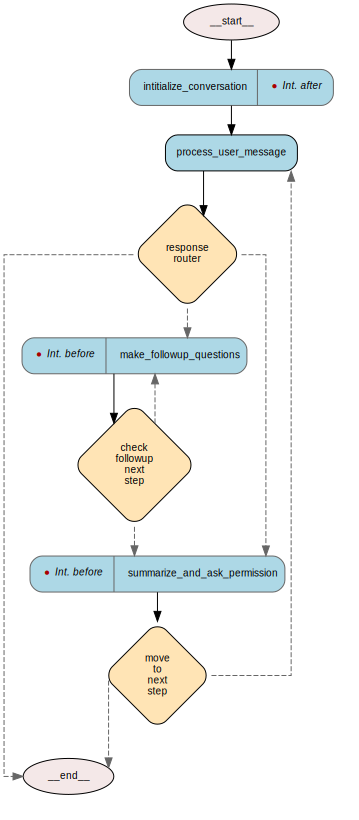

In [2]:
plan_graph_state = State(conversation=[], 
                         model_message=None, 
                         user_message=None,
                         next_interaction={"worflow_step": "user_prompt"}, 
                         plan_goal="", 
                         plan_summary="", 
                         plan_details=[], 
                         is_summary_approved=False, 
                         interaction_summary="", 
                         is_followup=False,
                         is_forward_permission=False,
                         is_permission_granted=False,
                         is_outside_of_step=False,
                         is_ready_to_move_forward=False)

graph = generate_plan_graph(plan_graph_state)

graph.visualize()

In [3]:
await graph.start_async()
rprint(plan_graph_state)
rprint(graph.chain_status)
rprint(graph.next_execution_node)

Initializing conversation...


State(
    version='44f1c3426cd72a291e94142dfe5e0c75',
    conversation=[{'role': 'assistant', 'content': 'Welcome! Please tell me your goal in a single sentence.'}],
    model_message='Welcome! Please tell me your goal in a single sentence.',
    user_message=None,
    is_followup=False,
    is_forward_permission=False,
    is_permission_granted=False,
    is_outside_of_step=False,
    plan_goal='',
    plan_summary='',
    plan_details=[],
    is_ready_to_move_forward=False,
    is_summary_approved=False,
    interaction_summary=''
)

ChainStatus.PAUSE

process_user_message

In [14]:
graph.update_state_and_checkpoint({"user_message": "I to plan a wedding party"})
await graph.resume_async()
rprint(plan_graph_state)
rprint(graph.chain_status)
rprint(graph.next_execution_node)


Making follow-up questions...
Checking follow-up next step...


State(
    version='44f1c3426cd72a291e94142dfe5e0c75',
    conversation=[
        {'role': 'assistant', 'content': 'Welcome! Please tell me your goal in a single sentence.'},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': 'I understand your goal. Let me ask a follow-up question.'},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."},
        {'role': 'user', 'content': 'I to plan a wedding party'},
        {'role': 'assistant', 'content': "Here's a follow-up question for clarification."}
    ],
    model_message="Here's a follow-up question for clarification.",
    user_message=None,
    is_followup=True,
    is_forward_permission=False,
    is_permission_granted=False,
    is_outside_of_step=False,
    plan_goal='Sample goal',
    plan_summary='',
    plan_details=[
        'Detail 1',
        'Detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2',
        'Follow-up detail 1',
        'Follow-up detail 2'
    ],
    is_ready_to_move_forward=False,
    is_summary_approved=False,
    interaction_summary=''
)

ChainStatus.PAUSE

make_followup_questions

In [ ]:
graph.update_state_and_checkpoint({"user_message": "I to plan a wedding party"})
await graph.resume_async()
rprint(plan_graph_state)
rprint(graph.chain_status)
rprint(graph.next_execution_node)


In [ ]:
%pdb

graph.update_state_and_checkpoint({"user_message": "I to plan a wedding party"})
await graph.resume_async()
rprint(plan_graph_state)
rprint(graph.chain_status)
rprint(graph.next_execution_node)


In [14]:
graph.start_from

In [13]:
graph.start_from = None

In [ ]:
rprint(graph.execution_plan)

In [ ]:
graph.is_cyclical_run

In [ ]:
graph.executed_nodes